In [1]:
%cd /content/drive/MyDrive/DroneYoloBuildsV8

/content/drive/MyDrive/DroneYoloBuildsV8


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("arturwork").project("builddetect")
version = project.version(5)
dataset = version.download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 829.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.


Extracting Dataset Version Zip to BuildDetect-5 in yolov8:: 100%|██████████| 391/391 [00:04<00:00, 89.87it/s]


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m


Edit data.yaml in train and val in you root
```
names:
- build
- build2
nc: 2
roboflow:
  license: CC BY 4.0
  project: builddetect
  url: https://universe.roboflow.com/arturwork/builddetect/dataset/5
  version: 5
  workspace: arturwork
test: ../test/images
train: /YOUR-ROOT-TO/BuildDetect-5/train/images
val: /YOUR-ROOT-TO/BuildDetect-5/valid/images
```



Segmentation

In [3]:
from ultralytics import YOLO

# Definir la ruta al archivo data.yaml
data_yaml = 'BuildDetect-5/data.yaml'

# Inicializar el modelo YOLOv8 para segmentación
model = YOLO('yolov8n-seg.yaml')  # Crear un nuevo modelo desde el archivo YAML
# Alternativamente, puedes usar un modelo pre-entrenado:
# model = YOLO('yolov8n-seg.pt')

# Entrenar el modelo
results = model.train(
    data=data_yaml,
    epochs=100,  # Número de épocas
    imgsz=640,   # Tamaño de la imagen de entrada
    batch=16,    # Tamaño del batch
     name='yolov8n_seg_custom'  # Nombre para guardar los resultados
)

# Evaluar el modelo en el conjunto de validación
results = model.val()



Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=BuildDetect-5/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_seg_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/train/labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100%|██████████| 183/183 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]


Plotting labels to runs/segment/yolov8n_seg_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/yolov8n_seg_custom
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.97G      3.862       18.3      5.199      4.339         69        640:  92%|█████████▏| 11/12 [00:08<00:00,  1.57it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      1/100      2.98G      3.842      18.17      5.153      4.326         28        640: 100%|██████████| 12/12 [00:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all          8         14    0.00124      0.143   0.000999   0.000442    0.00124      0.143   0.000999   0.000718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.05G      3.485      9.509      4.693      4.168         20        640: 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all          8         14    0.00124      0.143    0.00109   0.000504    0.00124      0.143    0.00109   0.000703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.93G      3.514      5.461      4.634      4.076         26        640: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all          8         14     0.0012      0.143    0.00179    0.00117     0.0012      0.143    0.00176    0.00105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.9G      3.308      4.493      4.358      3.838         35        640: 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all          8         14    0.00121      0.143    0.00396    0.00938    0.00121      0.143     0.0039     0.0108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.06G      3.291      4.347      4.284      3.631         15        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all          8         14    0.00121      0.143    0.00396    0.00938    0.00121      0.143     0.0039     0.0108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.04G      3.283      4.253      4.087       3.46         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all          8         14      0.502     0.0714     0.0241     0.0108      0.502     0.0714     0.0241     0.0134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.06G      3.078      4.187      4.044      3.291         21        640: 100%|██████████| 12/12 [00:04<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all          8         14      0.502     0.0714     0.0513     0.0113      0.502     0.0714     0.0513     0.0115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.97G       3.24      4.081      3.994      3.214         22        640: 100%|██████████| 12/12 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all          8         14    0.00358      0.143     0.0224    0.00503    0.00358      0.143     0.0224    0.00731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.05G      3.058      4.097      3.932       3.05         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all          8         14      0.508     0.0714     0.0223    0.00391      0.508     0.0714     0.0223    0.00469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.06G      3.125      4.124      3.986      2.988         14        640: 100%|██████████| 12/12 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          8         14    0.00679      0.143    0.00603    0.00156    0.00524      0.143    0.00403    0.00158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.92G       3.04      4.048      3.818      2.844         29        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all          8         14    0.00204      0.214    0.00495    0.00198    0.00204      0.214    0.00467    0.00181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.94G      2.966      3.865        3.7      2.817         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all          8         14     0.0631      0.143     0.0799     0.0113     0.0082     0.0714     0.0129    0.00392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.03G      3.123      4.059      3.696      2.901         53        640:  50%|█████     | 6/12 [00:02<00:02,  2.56it/s]

     13/100      3.03G      3.061      4.036      3.682      2.866         65        640:  75%|███████▌  | 9/12 [00:03<00:01,  2.76it/s]
100%|██████████| 755k/755k [00:00<00:00, 20.2MB/s]
     13/100      3.04G      3.049       4.01      3.707      2.818         25        640: 100%|██████████| 12/12 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          8         14     0.0263      0.143      0.102     0.0207     0.0263      0.143     0.0542     0.0185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.79G      2.923      3.961       3.66      2.771         29        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all          8         14     0.0176      0.143     0.0187    0.00393     0.0176      0.143     0.0487     0.0157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.79G      2.966      4.004      3.618      2.722         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all          8         14    0.00259      0.429    0.00678     0.0026       0.53     0.0714     0.0805     0.0173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.79G      2.985      3.932       3.46      2.735         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all          8         14     0.0474      0.214     0.0853     0.0177     0.0272      0.214     0.0846     0.0223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.69G      2.849      3.873      3.403      2.572         31        640: 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all          8         14     0.0119      0.143     0.0607     0.0184     0.0119      0.143      0.062     0.0193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.79G       2.86      3.918      3.258      2.596         28        640: 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          8         14      0.103     0.0714     0.0508    0.00941    0.00511      0.786     0.0262    0.00828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.72G      2.759      3.785      3.174      2.613         26        640: 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          8         14     0.0555     0.0714     0.0587     0.0203     0.0555     0.0714     0.0584     0.0254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.71G      2.778      3.797      3.198      2.558         20        640: 100%|██████████| 12/12 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all          8         14    0.00328        0.5     0.0396    0.00658    0.00328        0.5      0.041     0.0155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.81G      2.761      3.732      3.221      2.613         30        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all          8         14    0.00327      0.429     0.0101    0.00358    0.00432      0.571     0.0188    0.00598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.67G      2.695      3.795      3.194      2.528         34        640: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all          8         14        0.3      0.143      0.158      0.037        0.3      0.143      0.158     0.0397

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.75G      2.666      3.747      3.108      2.518         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all          8         14     0.0666      0.143      0.107     0.0512     0.0666      0.143      0.132     0.0404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.65G      2.595      3.638      3.072       2.49         29        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all          8         14      0.192      0.143      0.143      0.033      0.192      0.143      0.133     0.0303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.79G       2.62      3.668      2.979      2.353         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all          8         14      0.152     0.0714      0.143     0.0253      0.152     0.0714      0.144     0.0315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.79G      2.567      3.653      2.976      2.412         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all          8         14     0.0656     0.0714     0.0239    0.00737     0.0656     0.0714      0.024    0.00544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.79G      2.646      3.649      2.836      2.283         23        640: 100%|██████████| 12/12 [00:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all          8         14     0.0395      0.214       0.11     0.0311     0.0501      0.286      0.114      0.033



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.79G      2.622        3.6      2.781      2.324         29        640: 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all          8         14     0.0521      0.143     0.0662     0.0114      0.051      0.143     0.0729      0.013



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.79G      2.558       3.67      2.823      2.311         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all          8         14      0.112     0.0714      0.119     0.0532      0.197      0.143      0.132      0.039



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.66G       2.55      3.618      2.749       2.36         23        640: 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all          8         14      0.127      0.357      0.159     0.0745      0.152      0.429      0.165     0.0742



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.69G      2.464      3.546      2.732      2.305         16        640: 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all          8         14      0.167      0.357      0.151     0.0469      0.167      0.357      0.151     0.0561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.68G       2.46      3.536      2.622      2.245         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all          8         14      0.154      0.143      0.132     0.0348      0.154      0.143      0.134     0.0253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.71G      2.509      3.517      2.595      2.216         26        640: 100%|██████████| 12/12 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all          8         14      0.581      0.214      0.214     0.0693      0.461      0.143      0.192      0.076



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.73G      2.459      3.484      2.642      2.251         15        640: 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all          8         14      0.184      0.207      0.173     0.0517      0.128      0.143      0.141      0.052



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.67G      2.443      3.434      2.588      2.255         36        640: 100%|██████████| 12/12 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all          8         14      0.306      0.202      0.173     0.0735      0.306      0.202       0.17     0.0891



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.71G      2.389      3.469      2.555      2.178         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all          8         14     0.0565      0.143     0.0302     0.0153     0.0565      0.143      0.028     0.0124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.79G      2.314      3.516      2.579      2.157         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all          8         14     0.0261     0.0714     0.0231    0.00659     0.0261     0.0714     0.0228    0.00562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.81G      2.385      3.454       2.48      2.092         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all          8         14      0.195      0.214       0.21     0.0695      0.195      0.214      0.214     0.0588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.82G      2.321      3.446      2.447      2.101         17        640: 100%|██████████| 12/12 [00:03<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all          8         14      0.165      0.214      0.114      0.036      0.165      0.214      0.105     0.0365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.72G      2.282      3.358      2.376      2.016         27        640: 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all          8         14      0.707      0.143      0.211     0.0937      0.707      0.143       0.22     0.0757



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.79G      2.236      3.542      2.427      2.015         17        640: 100%|██████████| 12/12 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all          8         14      0.275      0.357       0.24     0.0649      0.275      0.357      0.241     0.0795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.67G      2.242      3.414      2.344      1.995         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all          8         14      0.525      0.191       0.23      0.055        0.5       0.14      0.187     0.0541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.81G      2.179      3.241      2.228      1.965         25        640: 100%|██████████| 12/12 [00:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all          8         14      0.199      0.286       0.24      0.105      0.199      0.286      0.238      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.79G      2.272      3.308      2.337      2.019         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all          8         14      0.463      0.286      0.254     0.0813      0.463      0.286      0.253     0.0714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.81G      2.196      3.366      2.246      1.964         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all          8         14      0.498      0.214      0.235     0.0622      0.404      0.143      0.215     0.0583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.66G       2.21      3.214      2.191      1.907         38        640: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          8         14      0.313      0.286       0.18     0.0777      0.313      0.286      0.183     0.0626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.85G      2.098      3.242       2.16      1.892         28        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all          8         14      0.398      0.214      0.162     0.0724      0.454      0.279      0.229     0.0842



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.81G      2.197      3.351      2.152      1.887         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all          8         14       0.38        0.5      0.346      0.123       0.38        0.5      0.348      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.69G      2.178      3.317      2.208      1.937         21        640: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all          8         14      0.488      0.262      0.248      0.119      0.488      0.262      0.248       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.81G      2.151      3.222      2.196      1.929         21        640: 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all          8         14      0.388      0.214      0.218      0.113      0.388      0.214       0.22      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.65G      2.109      3.154       2.07      1.881         28        640: 100%|██████████| 12/12 [00:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all          8         14      0.331      0.429      0.239     0.0998      0.331      0.429      0.241      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.77G      2.139      3.243      2.095      1.899         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all          8         14      0.319      0.357      0.215      0.069      0.272      0.286       0.21     0.0742



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.77G      2.111      3.105       2.04      1.884         21        640: 100%|██████████| 12/12 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all          8         14      0.349        0.5      0.261      0.107      0.336      0.429      0.253     0.0953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.65G      2.072      3.158      2.012       1.84         29        640: 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all          8         14      0.433      0.357      0.352      0.131      0.433      0.357      0.305      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.69G      2.107      3.146          2      1.826         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all          8         14      0.394      0.277      0.286      0.101      0.328      0.421      0.296      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.79G      2.095      3.177      2.048       1.82         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all          8         14      0.396      0.286      0.242      0.133      0.396      0.286      0.239      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.79G      2.028      2.977      1.954      1.784         20        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all          8         14      0.442      0.429      0.304      0.114       0.33      0.429      0.293     0.0862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.79G      2.021      3.049      1.928      1.792         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all          8         14      0.354      0.429      0.355      0.156      0.354      0.429      0.354       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.69G      2.006      3.169      1.974      1.859         22        640: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          8         14      0.421      0.429      0.297      0.135      0.421      0.429      0.294      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.69G      1.921      2.972      1.885      1.781         16        640: 100%|██████████| 12/12 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all          8         14      0.644      0.357       0.38      0.148      0.644      0.357       0.38      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.79G      1.983      3.094      1.932      1.792         27        640: 100%|██████████| 12/12 [00:05<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all          8         14      0.324      0.429      0.328     0.0951      0.324      0.429       0.33      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.69G      1.936      3.033      1.899      1.762         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          8         14      0.577      0.429      0.403      0.161      0.577      0.429      0.385      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.76G      1.952      3.066      1.839      1.789         20        640: 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all          8         14      0.414      0.429      0.363      0.169      0.364      0.429      0.284       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.72G      1.858      2.908      1.818      1.687         25        640: 100%|██████████| 12/12 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all          8         14       0.21      0.357      0.294       0.18       0.22      0.357      0.271      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.69G      1.975      2.971      1.914      1.756         31        640: 100%|██████████| 12/12 [00:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

                   all          8         14      0.487      0.268      0.305      0.131      0.712      0.334       0.39      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.81G      1.884      2.995      1.768      1.783         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all          8         14      0.503      0.214      0.336      0.151      0.503      0.214       0.34       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.66G      1.938      2.961      1.815      1.718         23        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          8         14      0.429      0.381      0.354      0.186      0.429      0.381      0.337      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.71G      1.922      3.002      1.759       1.68         28        640: 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all          8         14      0.393       0.49       0.45      0.227      0.379       0.46       0.43      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.71G      1.889      2.997      1.813      1.781         26        640: 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all          8         14      0.338      0.507      0.366      0.162       0.37        0.5      0.392      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.79G       1.82      2.863      1.691      1.728         29        640: 100%|██████████| 12/12 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all          8         14      0.455        0.5      0.429      0.218      0.455        0.5      0.429      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.79G      1.838      2.937      1.721      1.674         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all          8         14      0.433      0.523      0.425      0.217      0.433      0.523       0.43        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.63G      1.747       2.83      1.616      1.633         32        640: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all          8         14      0.484      0.571      0.403      0.221      0.484      0.571      0.403      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.67G      1.796      2.964      1.707      1.676         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all          8         14      0.442      0.569      0.401      0.211      0.442      0.569       0.43      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.79G      1.794      2.898      1.644      1.678         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all          8         14      0.441      0.498      0.373      0.167      0.441      0.498      0.325      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.71G      1.817      2.879      1.696       1.67         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all          8         14      0.377      0.548      0.393      0.188      0.377      0.548      0.393      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.71G      1.783      2.833      1.648      1.706         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all          8         14      0.469      0.571      0.499      0.236      0.469      0.571      0.502      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.79G      1.761      2.862      1.622      1.635         17        640: 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all          8         14      0.461      0.555       0.49      0.237      0.461      0.555      0.489      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.69G      1.752      2.823       1.64      1.687         21        640: 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all          8         14       0.42      0.483      0.394       0.18       0.42      0.483      0.401      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.73G      1.768      2.878      1.651      1.636         17        640: 100%|██████████| 12/12 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all          8         14      0.354      0.512      0.441      0.218      0.354      0.512      0.434      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.77G      1.789      2.845      1.595      1.608         36        640: 100%|██████████| 12/12 [00:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all          8         14      0.392      0.571      0.471      0.193      0.392      0.571      0.496      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.79G      1.778      2.829      1.618      1.663         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all          8         14      0.343      0.429      0.363       0.17      0.343      0.429      0.386      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.71G      1.689      2.754      1.582      1.673         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all          8         14      0.464        0.5      0.382       0.15      0.464        0.5      0.392      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.79G      1.713      2.724      1.587      1.654         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all          8         14      0.409      0.434      0.412      0.163      0.618      0.357       0.45      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.81G      1.792      2.821      1.587      1.627         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all          8         14      0.378      0.429      0.407      0.188      0.378      0.429      0.401      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.72G      1.665      2.762      1.591      1.576         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all          8         14      0.392      0.553      0.438      0.223      0.362      0.571      0.484      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.79G      1.712       2.75      1.587      1.617         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all          8         14      0.471      0.571      0.483      0.244      0.471      0.571      0.489       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.79G      1.723      2.707      1.529      1.572         33        640: 100%|██████████| 12/12 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all          8         14       0.37      0.571      0.457      0.211       0.37      0.571      0.449      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.72G      1.786      2.745      1.549       1.62         37        640: 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all          8         14      0.451      0.571      0.514      0.224      0.457      0.571      0.511      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.77G      1.705      2.795      1.545      1.607         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all          8         14      0.442      0.643      0.471      0.184      0.477      0.714      0.526      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.72G      1.665       2.76      1.518      1.619         29        640: 100%|██████████| 12/12 [00:04<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all          8         14      0.387      0.599      0.494      0.192      0.415        0.5      0.447      0.169


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.01G      1.706      2.695      1.637      1.579         14        640: 100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all          8         14      0.368        0.5       0.43      0.192       0.32        0.5      0.472      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.63G      1.533      2.628      1.499      1.518         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all          8         14      0.365      0.489      0.391      0.157      0.367      0.495      0.421      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.73G      1.603        2.6      1.528      1.551         14        640: 100%|██████████| 12/12 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all          8         14      0.387      0.424      0.408      0.159      0.387      0.424       0.41      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.6G      1.557      2.546      1.418      1.553         12        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all          8         14      0.417      0.571      0.477      0.209      0.417      0.571      0.467      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.6G      1.561       2.59       1.42      1.554         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          8         14      0.399      0.571      0.487      0.203      0.399      0.571      0.464      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.59G      1.548      2.596      1.404      1.495         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all          8         14      0.327      0.571      0.456      0.196      0.327      0.571      0.459      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.59G      1.476      2.483      1.367       1.49         13        640: 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all          8         14      0.368      0.571      0.431      0.172      0.389      0.571      0.407      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.73G      1.602      2.485      1.384      1.472         14        640: 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all          8         14      0.442        0.5       0.48      0.201      0.442        0.5      0.468      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.59G      1.587      2.451       1.44      1.492         14        640: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          8         14      0.476      0.497       0.48      0.205      0.476      0.497      0.468      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.6G      1.465       2.54       1.37        1.5         12        640: 100%|██████████| 12/12 [00:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all          8         14      0.388      0.643      0.483      0.202      0.379      0.522      0.465      0.192



100 epochs completed in 0.169 hours.
Optimizer stripped from runs/segment/yolov8n_seg_custom/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/yolov8n_seg_custom/weights/best.pt, 6.8MB

Validating runs/segment/yolov8n_seg_custom/weights/best.pt...
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]


                   all          8         14      0.471      0.571      0.483      0.244      0.471      0.571      0.489       0.21
                 build          7          7      0.333      0.571      0.489      0.279      0.333      0.571      0.501      0.224
                build2          7          7      0.609      0.571      0.477      0.208      0.609      0.571      0.477      0.196
Speed: 0.4ms preprocess, 3.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/segment/yolov8n_seg_custom
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(

                   all          8         14      0.442      0.571      0.462      0.227      0.442      0.571      0.467      0.193
                 build          7          7      0.348      0.571      0.489      0.264      0.348      0.571      0.501      0.225
                build2          7          7      0.536      0.571      0.434      0.191      0.536      0.571      0.434      0.161
Speed: 0.3ms preprocess, 31.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/yolov8n_seg_custom2



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/013_png.rf.56567021e19a21947dbaf287f1685244.jpg: 384x640 (no detections), 16.7ms
Speed: 1.4ms preprocess, 16.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


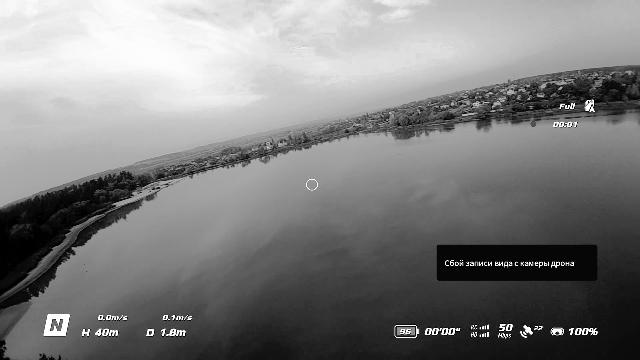

Detecciones para 013_png.rf.56567021e19a21947dbaf287f1685244.jpg:
Número de objetos detectados: 0



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/014_png.rf.faee8c1471e6435fd9afcb663244ff9e.jpg: 384x640 (no detections), 18.2ms
Speed: 2.5ms preprocess, 18.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


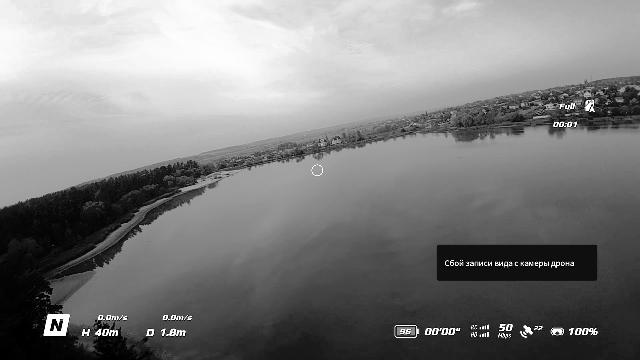

Detecciones para 014_png.rf.faee8c1471e6435fd9afcb663244ff9e.jpg:
Número de objetos detectados: 0



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/021_png.rf.28f01b04601e9465b1d2a6c032294258.jpg: 384x640 (no detections), 14.5ms
Speed: 1.3ms preprocess, 14.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


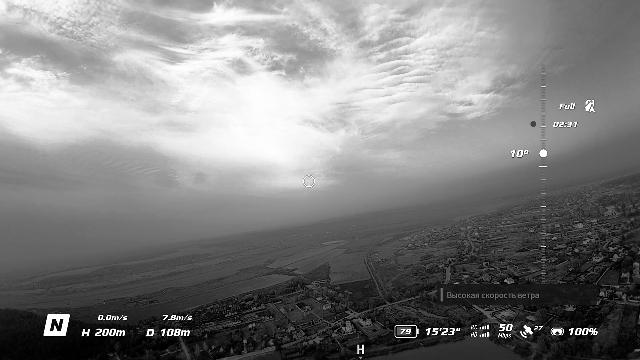

Detecciones para 021_png.rf.28f01b04601e9465b1d2a6c032294258.jpg:
Número de objetos detectados: 0



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/23_png.rf.f699489deb92e36be2a45b0651a8bc81.jpg: 384x640 4 builds, 1 build2, 19.0ms
Speed: 1.3ms preprocess, 19.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


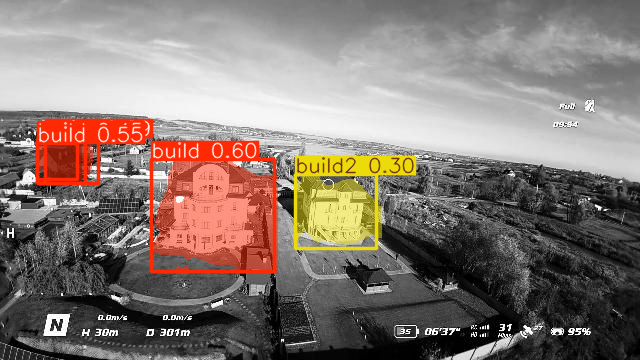

Detecciones para 23_png.rf.f699489deb92e36be2a45b0651a8bc81.jpg:
Número de objetos detectados: 5
  Clase: build, Confianza: 0.60
  Clase: build, Confianza: 0.55
  Clase: build, Confianza: 0.45
  Clase: build2, Confianza: 0.30
  Clase: build, Confianza: 0.29



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/25_png.rf.11cd70935a39837f7f839ddf70b393c5.jpg: 384x640 3 builds, 3 build2s, 18.7ms
Speed: 1.3ms preprocess, 18.7ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


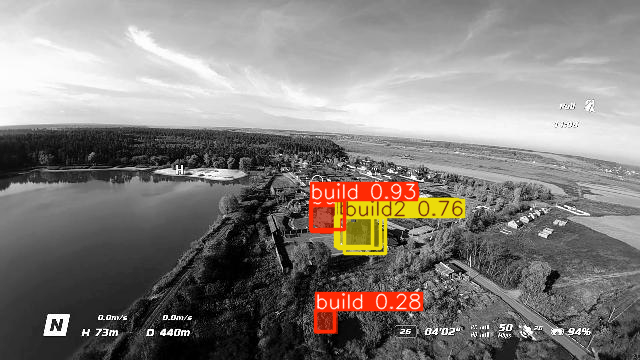

Detecciones para 25_png.rf.11cd70935a39837f7f839ddf70b393c5.jpg:
Número de objetos detectados: 6
  Clase: build, Confianza: 0.93
  Clase: build2, Confianza: 0.76
  Clase: build2, Confianza: 0.45
  Clase: build2, Confianza: 0.44
  Clase: build, Confianza: 0.43
  Clase: build, Confianza: 0.28



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/9_png.rf.29fd11c24b38c6ccb4a40de001de75b1.jpg: 384x640 3 builds, 23.9ms
Speed: 1.3ms preprocess, 23.9ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


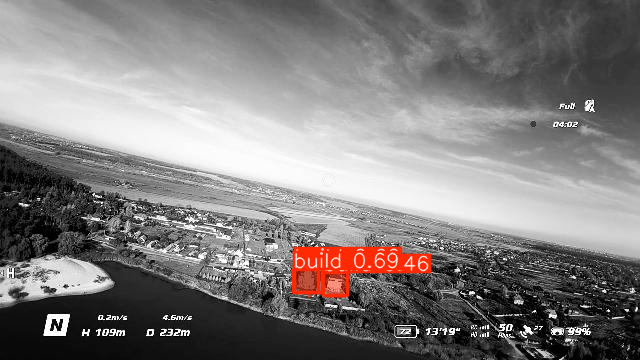

Detecciones para 9_png.rf.29fd11c24b38c6ccb4a40de001de75b1.jpg:
Número de objetos detectados: 3
  Clase: build, Confianza: 0.69
  Clase: build, Confianza: 0.62
  Clase: build, Confianza: 0.46



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/build_1_02_png.rf.671f5f4b78fe5d065bfeb7f0365e95cc.jpg: 544x640 1 build, 165.1ms
Speed: 1.8ms preprocess, 165.1ms inference, 8.9ms postprocess per image at shape (1, 3, 544, 640)


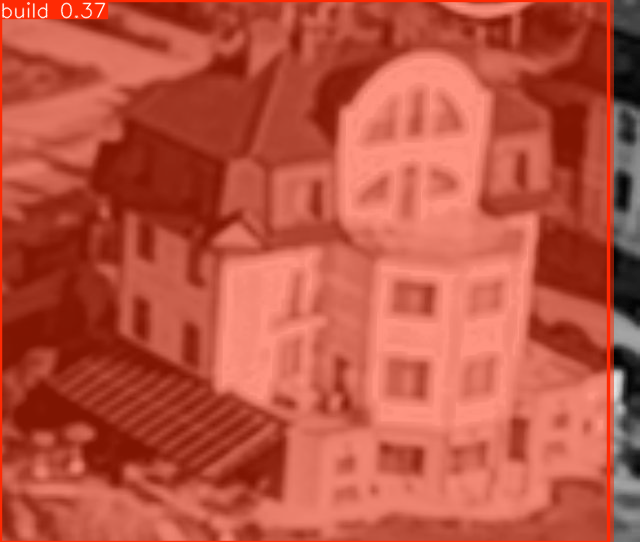

Detecciones para build_1_02_png.rf.671f5f4b78fe5d065bfeb7f0365e95cc.jpg:
Número de objetos detectados: 1
  Clase: build, Confianza: 0.37



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/build_2_05_png.rf.8648184583def533c0dcd00d493f8b65.jpg: 544x640 1 build, 19.6ms
Speed: 1.7ms preprocess, 19.6ms inference, 4.2ms postprocess per image at shape (1, 3, 544, 640)


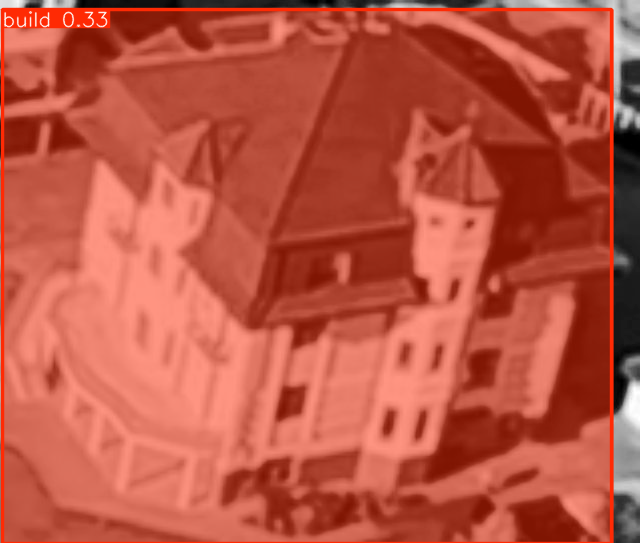

Detecciones para build_2_05_png.rf.8648184583def533c0dcd00d493f8b65.jpg:
Número de objetos detectados: 1
  Clase: build, Confianza: 0.33


Resultados guardados en validation_results


In [5]:
from ultralytics import YOLO
import glob
import cv2
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
import numpy as np

# Cargar el modelo entrenado
model = YOLO('/content/drive/MyDrive/DroneYoloBuildsV8/runs/segment/yolov8n_seg_custom/weights/best.pt')  # Ajusta esta ruta a donde se guardó tu mejor modelo

# Directorio que contiene las imágenes para validar
image_dir = '/content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images'  # Ajusta esta ruta a tu directorio de imágenes

# Obtener todas las imágenes en el directorio
image_files = glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir, '*.png'))

# Crear un directorio para guardar los resultados
results_dir = 'validation_results'
os.makedirs(results_dir, exist_ok=True)

# Procesar cada imagen
for img_path in image_files:
    # Realizar la predicción
    results = model(img_path)

    # Obtener la imagen con las detecciones dibujadas
    img = results[0].plot()

    # Convertir de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Guardar la imagen con las detecciones
    output_path = os.path.join(results_dir, os.path.basename(img_path))
    cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

    # Mostrar la imagen usando cv2_imshow
    cv2_imshow(img_rgb)

    # Mostrar información sobre las detecciones
    print(f"Detecciones para {os.path.basename(img_path)}:")
    for r in results:
        print(f"Número de objetos detectados: {len(r.boxes)}")
        for box in r.boxes:
            print(f"  Clase: {model.names[int(box.cls)]}, Confianza: {box.conf.item():.2f}")

    print("\n")  # Agregar una línea en blanco entre imágenes

print(f"Resultados guardados en {results_dir}")

# Transfer learning with COCO

In [6]:
from ultralytics import YOLO

# Definir la ruta al archivo data.yaml
data_yaml = 'BuildDetect-5/data.yaml'

# Inicializar el modelo YOLOv8 pre-entrenado en COCO para segmentación
model = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n-seg.pt')

# Entrenar el modelo (fine-tuning)
results = model.train(
    data=data_yaml,
    epochs=100,  # Número de épocas
    imgsz=640,   # Tamaño de la imagen de entrada
    batch=16,    # Tamaño del batch
    name='yolov8n_seg_custom_transfer',  # Nombre para guardar los resultados
    pretrained=True,  # Usar pesos pre-entrenados
    freeze=10,  # Congelar las primeras 10 capas
    lr0=0.001,  # Tasa de aprendizaje inicial
    patience=50,  # Paciencia para early stopping
    save=True,  # Guardar los mejores checkpoints
    device='0'  # Usar GPU 0 (cambia a 'cpu' si no tienes GPU)
)

# Evaluar el modelo en el conjunto de validación
val_results = model.val()



100%|██████████| 6.73M/6.73M [00:00<00:00, 84.4MB/s]


Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=BuildDetect-5/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8n_seg_custom_transfer, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/train/labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100%|██████████| 183/183 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]


Plotting labels to runs/segment/yolov8n_seg_custom_transfer/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/yolov8n_seg_custom_transfer
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.94G      2.063      4.361      4.131      1.768         28        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all          8         14    0.00216      0.357      0.112     0.0958    0.00216      0.357      0.112     0.0545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100       1.8G      1.655      3.395      3.234      1.498         20        640: 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all          8         14    0.00124      0.214      0.146     0.0823    0.00124      0.214      0.146      0.088



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.78G      1.675      3.181      3.153      1.482         26        640: 100%|██████████| 12/12 [00:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all          8         14    0.00122      0.214      0.113     0.0934    0.00122      0.214      0.113     0.0829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100       1.8G      1.677      3.003      2.804      1.427         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all          8         14    0.00216      0.357      0.149      0.117    0.00216      0.357       0.15     0.0834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.81G      1.617      2.968       2.64      1.406         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all          8         14      0.274      0.102      0.089     0.0705      0.274      0.102     0.0895     0.0575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.78G      1.617      2.845      2.416       1.38         24        640: 100%|██████████| 12/12 [00:04<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          8         14      0.471      0.205      0.178      0.121      0.471      0.205      0.183      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100       1.8G      1.573      2.849      2.332      1.382         21        640: 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all          8         14      0.538      0.214      0.207       0.11      0.538      0.214      0.224      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.83G      1.607      2.811      2.318      1.397         22        640: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all          8         14      0.489      0.341      0.375      0.244      0.489      0.341      0.375      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.82G      1.559        2.7      2.164      1.333         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all          8         14      0.336      0.476      0.428      0.243      0.336      0.476      0.436      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.77G      1.726      2.801      2.325       1.39         14        640: 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all          8         14      0.736      0.405      0.425      0.245      0.736      0.405      0.457      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100       1.8G      1.594      2.693      2.092      1.316         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all          8         14      0.693      0.268      0.331      0.248      0.693      0.268      0.377      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.86G      1.484      2.549      2.013      1.288         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all          8         14       0.92      0.286      0.415      0.221       0.54      0.479      0.444      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.78G      1.537      2.669      2.021      1.351         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all          8         14      0.409       0.57      0.423      0.229      0.409       0.57      0.428       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.78G      1.517      2.545       1.95      1.363         29        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all          8         14       0.44      0.459        0.4      0.225      0.432        0.5      0.435      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.78G      1.552      2.559      1.866      1.302         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all          8         14      0.614      0.429      0.431      0.204      0.614      0.429      0.431      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.78G      1.421      2.517      1.714      1.251         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all          8         14      0.553      0.415        0.5      0.267      0.553      0.415      0.511      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.82G      1.458      2.405      1.806      1.246         31        640: 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          8         14      0.607        0.5      0.439      0.196      0.607        0.5       0.44      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.77G      1.394      2.355      1.667       1.24         28        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all          8         14      0.509      0.483      0.497      0.285      0.639      0.498      0.524      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.83G      1.365      2.267      1.582      1.242         26        640: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all          8         14      0.785      0.357      0.538       0.29      0.785      0.357      0.473      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.83G       1.33      2.319      1.526       1.23         20        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all          8         14       0.89      0.355      0.537      0.277      0.944      0.411      0.572      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.81G       1.37      2.292      1.526      1.259         30        640: 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all          8         14      0.734      0.494      0.618      0.324      0.734      0.494      0.608      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       1.8G      1.437      2.351      1.498       1.22         34        640: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          8         14      0.829      0.422      0.612      0.282      0.829      0.422      0.585      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.75G      1.313      2.222      1.452      1.223         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all          8         14      0.651      0.485      0.564      0.245      0.752      0.429      0.493      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       1.8G      1.303      2.168      1.443      1.253         29        640: 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all          8         14      0.767      0.643      0.706      0.352      0.613      0.418      0.512      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.78G      1.277      2.187      1.383      1.184         28        640: 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all          8         14      0.705      0.623      0.647      0.337      0.605        0.5       0.55      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100       1.8G      1.255      2.082      1.291      1.166         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all          8         14      0.888      0.427      0.586       0.29      0.888      0.427      0.533      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.79G      1.308      2.103      1.311       1.18         23        640: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all          8         14       0.64      0.695      0.709      0.325      0.699        0.5      0.609      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.77G      1.306      2.101       1.32      1.149         29        640: 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          8         14      0.507      0.675      0.652      0.331      0.426      0.571      0.529      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.79G      1.253      2.116      1.281       1.14         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all          8         14      0.576      0.571      0.617      0.368      0.576      0.571      0.597       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100       1.8G      1.282      2.179       1.26      1.182         23        640: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all          8         14      0.873      0.641      0.714      0.446      0.873      0.641      0.718      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.82G      1.211      2.061      1.243      1.157         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all          8         14      0.778      0.714      0.774      0.466      0.756       0.62      0.687      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100       1.8G      1.209      2.044      1.161      1.147         27        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all          8         14      0.774      0.677      0.772      0.402      0.839      0.571       0.76      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.82G      1.232      2.037      1.186      1.127         26        640: 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all          8         14      0.673      0.786      0.736      0.343       0.54      0.643      0.626      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.85G      1.223       2.06      1.202      1.145         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all          8         14      0.756      0.854      0.842      0.408      0.655      0.677      0.735      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100       1.8G      1.195      1.995      1.112      1.128         36        640: 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all          8         14      0.784       0.78      0.733      0.334      0.642      0.642      0.582      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.84G      1.204      2.029      1.136       1.13         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all          8         14      0.766      0.714      0.734      0.344      0.717      0.537      0.646      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.78G      1.218      1.922      1.116      1.127         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all          8         14      0.717      0.755      0.805      0.402      0.708      0.714      0.743      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100       1.8G      1.242      2.035      1.129      1.119         27        640: 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all          8         14      0.768      0.857      0.834      0.432      0.631      0.714      0.746      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.82G      1.241      2.008      1.122      1.135         17        640: 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all          8         14      0.908      0.775      0.846        0.4      0.823      0.609      0.783      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.82G      1.202      1.959      1.116      1.116         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all          8         14          1      0.702      0.814      0.464      0.903      0.613      0.752       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.76G      1.159      2.018      1.103      1.105         17        640: 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all          8         14      0.896      0.757      0.872      0.498      0.809      0.671      0.837      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100       1.8G      1.157      1.935       1.06      1.094         31        640: 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all          8         14      0.656      0.848      0.842      0.451      0.608      0.779      0.766      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.78G      1.152      1.915      1.028      1.082         25        640: 100%|██████████| 12/12 [00:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all          8         14      0.813      0.762      0.851      0.527       0.96      0.539      0.716      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.79G      1.204      1.936      1.039      1.139         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          8         14      0.813      0.786      0.884      0.481      0.732      0.714      0.797      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.78G      1.163      1.993      1.029        1.1         31        640: 100%|██████████| 12/12 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all          8         14       0.87      0.786       0.89      0.484      0.701      0.643      0.803      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.78G      1.175       1.89      1.034      1.106         38        640: 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all          8         14      0.909      0.844       0.88      0.455      0.833      0.624      0.782      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.82G      1.132      1.909      1.038      1.098         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all          8         14      0.871      0.828      0.913      0.439      0.892      0.619      0.807      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.82G      1.215      1.993      1.039      1.112         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all          8         14      0.784      0.902      0.924       0.44      0.778      0.714       0.85      0.453

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.82G       1.12      1.954     0.9868      1.078         21        640: 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all          8         14      0.746      0.891      0.908      0.381      0.947      0.606       0.78      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100       1.8G      1.113      1.852      0.983      1.086         21        640: 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all          8         14       0.77      0.742      0.879      0.484      0.871        0.5      0.723      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.79G      1.155      1.826     0.9496      1.087         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all          8         14      0.884      0.856      0.929      0.504      0.605      0.857       0.86      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.76G      1.127       1.83      0.943      1.085         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all          8         14      0.804      0.857      0.894      0.474      0.735      0.739      0.844      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.76G      1.119      1.859     0.9318      1.083         21        640: 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all          8         14      0.742      0.831      0.823      0.424      0.897      0.635      0.751      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100       1.8G      1.093      1.821     0.9458      1.065         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all          8         14      0.844      0.848       0.89      0.478      0.765      0.784      0.838      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.82G      1.148      1.814     0.9294      1.064         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all          8         14      0.866      0.857       0.92      0.522      0.734      0.714      0.855      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.78G      1.134      1.891     0.9576      1.068         24        640: 100%|██████████| 12/12 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all          8         14      0.991      0.775      0.889      0.467      0.923      0.704      0.819      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.79G      1.053      1.724     0.9193      1.029         20        640: 100%|██████████| 12/12 [00:04<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all          8         14      0.787      0.741      0.796      0.396      0.801      0.604      0.697      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100       1.8G      1.019      1.773     0.8771      1.026         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all          8         14      0.903      0.786      0.876      0.438       0.81      0.714      0.794      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.81G      1.073      1.858     0.9244      1.085         22        640: 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all          8         14      0.904      0.854      0.865      0.471       0.82      0.704      0.789      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.82G      1.047       1.77     0.8723      1.045         16        640: 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all          8         14      0.904      0.857      0.878       0.49      0.766      0.714      0.815      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.79G      1.064      1.818     0.9268      1.072         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all          8         14      0.982      0.847      0.953      0.516       0.93      0.752      0.909      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.84G       1.08      1.768     0.8916      1.051         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all          8         14      0.961      0.747      0.945      0.538      0.961      0.747      0.889      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.75G      1.076       1.75     0.8926      1.046         20        640: 100%|██████████| 12/12 [00:04<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all          8         14          1      0.779       0.93      0.489      0.919      0.696      0.848      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.84G      1.009      1.689     0.8243      1.026         25        640: 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all          8         14      0.914      0.857      0.912      0.495      0.905      0.772      0.863      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.82G      1.064      1.781     0.8758      1.049         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all          8         14      0.911      0.843      0.913      0.481       0.98      0.641      0.798      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.79G      1.014      1.717     0.8287      1.065         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all          8         14      0.984      0.855      0.923      0.443      0.826      0.714      0.814      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.78G      1.043       1.76     0.8415      1.048         23        640: 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all          8         14      0.972       0.85      0.931       0.46       0.85      0.696      0.851      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.83G      1.037      1.753     0.8136      1.024         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all          8         14       0.88      0.842      0.924      0.466      0.834      0.714      0.841      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.82G      1.021      1.702     0.8448       1.05         26        640: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all          8         14       0.91      0.857      0.903      0.456      0.743      0.776       0.83      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.77G     0.9462      1.628     0.7735      1.017         29        640: 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          8         14      0.894      0.856      0.906      0.499      0.763      0.774      0.831      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.79G      1.016      1.725      0.809      1.045         28        640: 100%|██████████| 12/12 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all          8         14      0.873      0.857      0.896      0.493      0.853      0.706      0.819      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.75G     0.9755       1.65      0.756      1.029         32        640: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all          8         14      0.878      0.838      0.917      0.488      0.855      0.714      0.819      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.81G      0.958       1.71      0.807      1.012         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all          8         14      0.943      0.857      0.937      0.504      0.911      0.714      0.838      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.78G     0.9802      1.662     0.7837      1.033         26        640: 100%|██████████| 12/12 [00:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all          8         14      0.954      0.857      0.928      0.503      0.916      0.714      0.855      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.84G      1.022      1.741     0.8172       1.04         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all          8         14      0.902      0.857      0.908      0.469      0.803      0.699       0.82      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.86G     0.9565      1.664     0.7862      1.027         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all          8         14      0.897      0.857      0.894      0.423      0.743      0.714       0.76      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.78G     0.9852      1.695     0.8054      1.033         17        640: 100%|██████████| 12/12 [00:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all          8         14      0.894      0.857      0.942      0.479       0.95      0.702      0.892      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.82G     0.9458      1.646     0.7822      1.034         21        640: 100%|██████████| 12/12 [00:04<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all          8         14      0.951      0.857      0.937      0.512      0.869      0.786      0.887      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.87G     0.9937      1.649     0.7915      1.028         17        640: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all          8         14      0.866      0.857      0.931      0.465      0.964      0.755      0.869       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.77G          1      1.667     0.7661      1.015         36        640: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all          8         14      0.805      0.827      0.875      0.417      0.875      0.707      0.801      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.78G     0.9595      1.673     0.7718      1.005         24        640: 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all          8         14      0.831      0.857      0.878      0.455      0.661      0.714      0.783       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.83G     0.9099      1.591     0.7257      1.024         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          8         14      0.908      0.852      0.913        0.5      0.912      0.713      0.844      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.78G     0.9262      1.579       0.73      1.018         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all          8         14      0.893      0.849      0.925      0.489      0.931      0.714      0.854      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100       1.8G     0.9645      1.633     0.7537     0.9886         24        640: 100%|██████████| 12/12 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          8         14      0.886      0.857      0.934      0.493      0.874      0.714       0.84      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100       1.8G     0.9773      1.598      0.789      1.019         18        640: 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all          8         14      0.898      0.857      0.947      0.502      0.933      0.714      0.879      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.79G      0.962      1.613     0.7572      1.002         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all          8         14      0.931      0.823       0.95      0.507      0.897      0.709      0.882      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.79G     0.9881      1.614     0.7401      1.007         33        640: 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all          8         14      0.905      0.857      0.927      0.492      0.889      0.786      0.882      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.81G      1.043      1.645     0.8027      1.034         37        640: 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all          8         14      0.903      0.857      0.911      0.478      0.888      0.786      0.835      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.76G     0.9451      1.564     0.7239      1.005         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all          8         14      0.905      0.856      0.907      0.445      0.871      0.786      0.832      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.85G     0.8972      1.599     0.7177       0.99         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all          8         14      0.917      0.857      0.903      0.467      0.853      0.786      0.862      0.468


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.04G      1.176      1.774     0.9779      1.093         14        640: 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all          8         14      0.973      0.857      0.928      0.513      0.937      0.786      0.858      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.78G      1.109      1.736     0.9248      1.069         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all          8         14      0.964      0.857      0.926       0.51      0.886      0.714      0.825      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.71G      1.109      1.735     0.9088      1.031         14        640: 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          8         14      0.982      0.855      0.939      0.489      0.898      0.694       0.81      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.72G      1.028      1.684     0.8431      1.033         12        640: 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all          8         14      0.973      0.857      0.954      0.474      0.958      0.698      0.822      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.73G     0.9741      1.677     0.7969      1.007         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          8         14      0.919      0.786      0.902      0.437      0.987      0.695      0.826      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.72G      1.075      1.754     0.8764       1.01         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          8         14      0.862      0.786      0.903      0.443      0.935      0.705      0.827      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.73G     0.9698      1.595     0.7388     0.9744         13        640: 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all          8         14      0.826      0.869      0.966      0.465      0.894      0.714      0.824       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.74G       1.09      1.583     0.8214      1.006         14        640: 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all          8         14      0.905      0.766      0.889       0.47      0.887      0.714      0.813      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.73G      1.087      1.678      0.888      1.026         14        640: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all          8         14      0.919      0.764       0.89      0.482      0.869      0.714      0.815      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.72G     0.9929       1.67      0.797     0.9813         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all          8         14      0.927      0.835      0.961      0.488      0.993      0.769      0.888      0.431



100 epochs completed in 0.166 hours.
Optimizer stripped from runs/segment/yolov8n_seg_custom_transfer/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/yolov8n_seg_custom_transfer/weights/best.pt, 6.8MB

Validating runs/segment/yolov8n_seg_custom_transfer/weights/best.pt...
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]


                   all          8         14      0.961      0.747      0.945      0.543      0.961      0.747      0.888      0.497
                 build          7          7      0.921      0.857      0.953       0.56      0.921      0.857      0.953      0.485
                build2          7          7          1      0.637      0.937      0.525          1      0.637      0.823      0.509
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/segment/yolov8n_seg_custom_transfer
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


                   all          8         14       0.96      0.747      0.945      0.543       0.96      0.747      0.889      0.491
                 build          7          7      0.921      0.857      0.953       0.56      0.921      0.857      0.953      0.487
                build2          7          7          1      0.637      0.937      0.525          1      0.637      0.824      0.495
Speed: 0.3ms preprocess, 11.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/segment/yolov8n_seg_custom_transfer2



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/013_png.rf.56567021e19a21947dbaf287f1685244.jpg: 384x640 2 builds, 1 build2, 18.7ms
Speed: 2.8ms preprocess, 18.7ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)


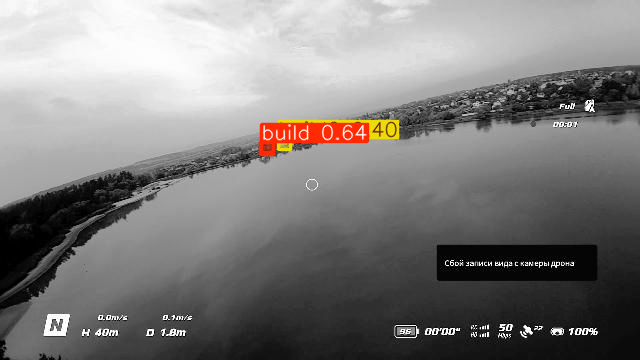

Detecciones para 013_png.rf.56567021e19a21947dbaf287f1685244.jpg:
Número de objetos detectados: 3
  Clase: build, Confianza: 0.64
  Clase: build, Confianza: 0.54
  Clase: build2, Confianza: 0.40



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/014_png.rf.faee8c1471e6435fd9afcb663244ff9e.jpg: 384x640 3 builds, 14.8ms
Speed: 2.2ms preprocess, 14.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


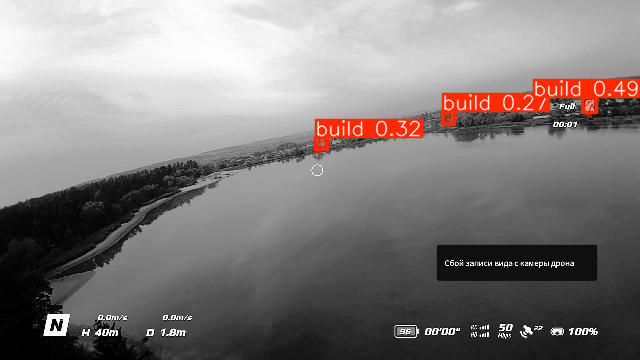

Detecciones para 014_png.rf.faee8c1471e6435fd9afcb663244ff9e.jpg:
Número de objetos detectados: 3
  Clase: build, Confianza: 0.49
  Clase: build, Confianza: 0.32
  Clase: build, Confianza: 0.27



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/021_png.rf.28f01b04601e9465b1d2a6c032294258.jpg: 384x640 2 builds, 1 build2, 15.2ms
Speed: 1.2ms preprocess, 15.2ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


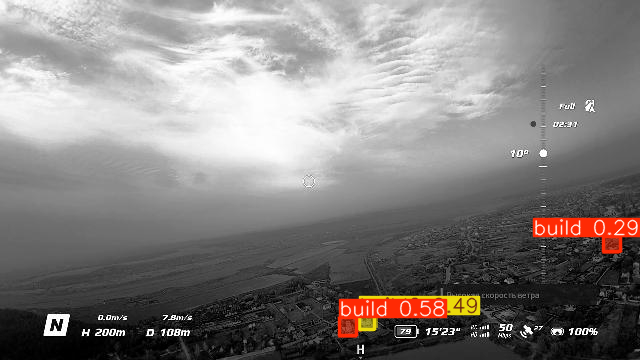

Detecciones para 021_png.rf.28f01b04601e9465b1d2a6c032294258.jpg:
Número de objetos detectados: 3
  Clase: build, Confianza: 0.58
  Clase: build2, Confianza: 0.49
  Clase: build, Confianza: 0.29



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/23_png.rf.f699489deb92e36be2a45b0651a8bc81.jpg: 384x640 2 builds, 1 build2, 16.1ms
Speed: 1.4ms preprocess, 16.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


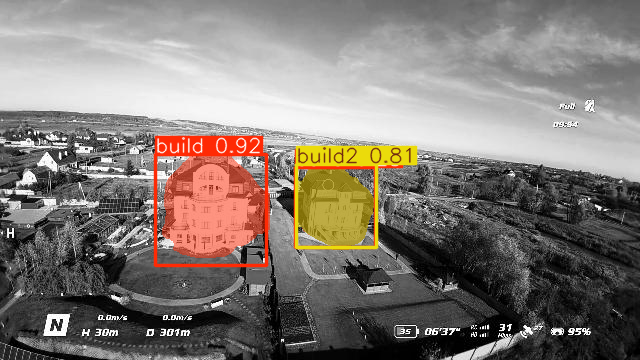

Detecciones para 23_png.rf.f699489deb92e36be2a45b0651a8bc81.jpg:
Número de objetos detectados: 3
  Clase: build, Confianza: 0.92
  Clase: build2, Confianza: 0.81
  Clase: build, Confianza: 0.28



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/25_png.rf.11cd70935a39837f7f839ddf70b393c5.jpg: 384x640 1 build, 1 build2, 19.6ms
Speed: 1.4ms preprocess, 19.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


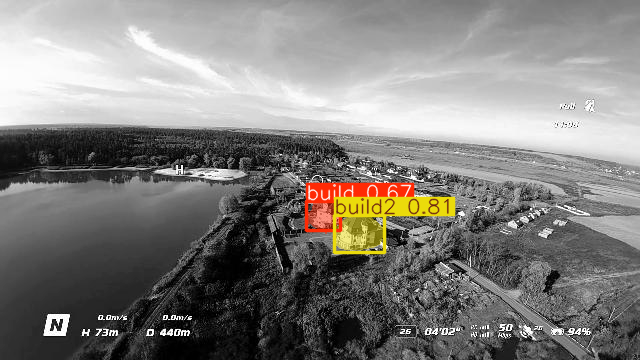

Detecciones para 25_png.rf.11cd70935a39837f7f839ddf70b393c5.jpg:
Número de objetos detectados: 2
  Clase: build2, Confianza: 0.81
  Clase: build, Confianza: 0.67



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/9_png.rf.29fd11c24b38c6ccb4a40de001de75b1.jpg: 384x640 2 builds, 1 build2, 13.6ms
Speed: 1.3ms preprocess, 13.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


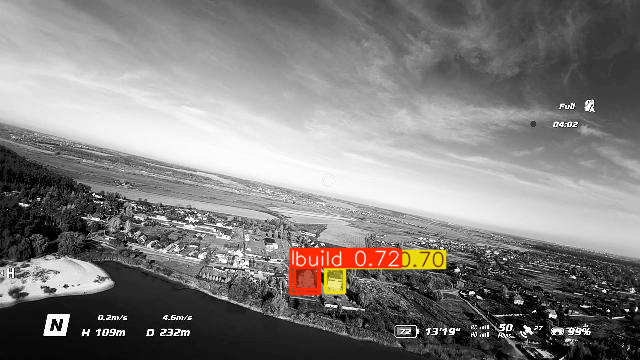

Detecciones para 9_png.rf.29fd11c24b38c6ccb4a40de001de75b1.jpg:
Número de objetos detectados: 3
  Clase: build, Confianza: 0.72
  Clase: build2, Confianza: 0.70
  Clase: build, Confianza: 0.30



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/build_1_02_png.rf.671f5f4b78fe5d065bfeb7f0365e95cc.jpg: 544x640 1 build, 20.3ms
Speed: 1.6ms preprocess, 20.3ms inference, 4.0ms postprocess per image at shape (1, 3, 544, 640)


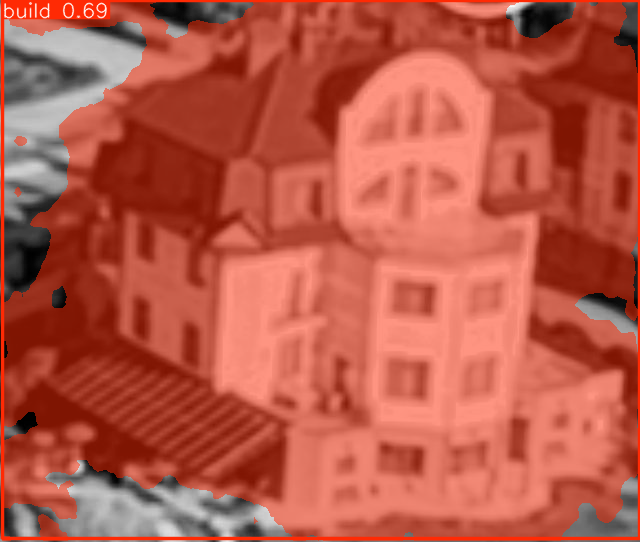

Detecciones para build_1_02_png.rf.671f5f4b78fe5d065bfeb7f0365e95cc.jpg:
Número de objetos detectados: 1
  Clase: build, Confianza: 0.69



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/build_2_05_png.rf.8648184583def533c0dcd00d493f8b65.jpg: 544x640 1 build2, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 4.0ms postprocess per image at shape (1, 3, 544, 640)


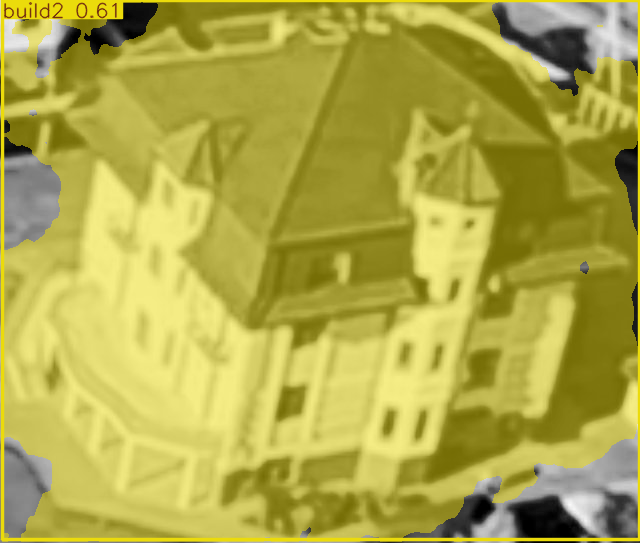

Detecciones para build_2_05_png.rf.8648184583def533c0dcd00d493f8b65.jpg:
Número de objetos detectados: 1
  Clase: build2, Confianza: 0.61


Resultados guardados en validation_results


In [7]:
from ultralytics import YOLO
import glob
import cv2
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
import numpy as np

# Cargar el modelo entrenado
model = YOLO('/content/drive/MyDrive/DroneYoloBuildsV8/runs/segment/yolov8n_seg_custom_transfer/weights/best.pt')  # Ajusta esta ruta a donde se guardó tu mejor modelo

# Directorio que contiene las imágenes para validar
image_dir = '/content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images'  # Ajusta esta ruta a tu directorio de imágenes

# Obtener todas las imágenes en el directorio
image_files = glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir, '*.png'))

# Crear un directorio para guardar los resultados
results_dir = 'validation_results'
os.makedirs(results_dir, exist_ok=True)

# Procesar cada imagen
for img_path in image_files:
    # Realizar la predicción
    results = model(img_path)

    # Obtener la imagen con las detecciones dibujadas
    img = results[0].plot()

    # Convertir de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Guardar la imagen con las detecciones
    output_path = os.path.join(results_dir, os.path.basename(img_path))
    cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

    # Mostrar la imagen usando cv2_imshow
    cv2_imshow(img_rgb)

    # Mostrar información sobre las detecciones
    print(f"Detecciones para {os.path.basename(img_path)}:")
    for r in results:
        print(f"Número de objetos detectados: {len(r.boxes)}")
        for box in r.boxes:
            print(f"  Clase: {model.names[int(box.cls)]}, Confianza: {box.conf.item():.2f}")

    print("\n")  # Agregar una línea en blanco entre imágenes

print(f"Resultados guardados en {results_dir}")